# Ejercicio Van der Walls
La ecuación de estado de Van der Walls para un gas real es 


$$\begin{equation} 
\left(P+\frac{a}{V^2} \right)\left(V-b \right)=R\,T \label{eqn:VdeW}
\end{equation}
$$

donde:

**P** = presión en _atm_
 
**T** = temperatura en _k_
 
**R** = constante universal de los gases ideales en _atm-L/(gmol K)_
 
**V** = volumen molar del gas en _L/mol_
 
**a, b** = constantes particulares para cada gas

Para los siguientes gases, calcule el volumen molar $(V)$ a $80\,°C$ para presiones de 10, 20, 30 y 100 $atm$.

Gas| a| b|
---|---|---|
Dióxido de carbono| 3.599| 0.04267
Dimetilamina| 37.49| 0.19700
He | 0.03412| 0.02370
Óxido nítrico| 1.34| 0.02789

## Solución

La ecuación \ref{eqn:VdeW} se puede escribir como:

$$
\begin{equation}
f(V) = P\,V^3-b\,P\,V^2-R\,T\,V^2+a\,V-a\,b =0 \label{eqn:VdeWCubic}
\end{equation}
$$

### Para el caso del dióxido de carbono

Para $T = 80\,°C$,  $P = 10\, atm$, $a = 3.599$ y $b = 0.04267$

**Paso 1:** Buscar un valor inicial, se puede hacer de manera gráfica, o bien, considerando el significado físico de la raíz, o del problema. 

> **Paso 1.1:** Considerando el significado físico de la raíz, en el caso del volumen, una buena aproximación se puede hacer calculando el volumen a partir de la ley de los gases ideales:

$$
\begin{split}
V_0 & = \dfrac{R\,T}{P}\\
    & = \dfrac{(0.08205)(353.15)}{10}\\
    & = 2.89
\end{split}
$$

>> **Paso 1.2:** De manera gráfica, analizando la funcion $f(V)$; en este caso el dominio de la función depende del siginificado físico de la raíz, $V > 0$. Por ejemplo:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T, P, R, a, b = 353.15, 10, 0.08205, 3.599, 0.04267
def f(V):   
    return P*V**3-b*P*V**2-R*T*V**2+a*V-a*b

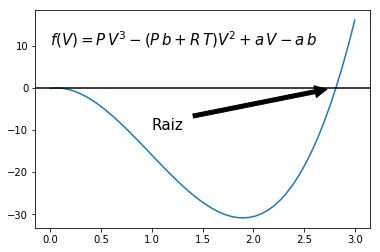

In [3]:
V = np.linspace(0, 3)
plt.plot(V,f(V))
plt.axhline(color = "k")
plt.text(0,10, r'$f(V)=P\,V^3-(P\,b+R\,T)V^2+a\,V-a\,b$',fontsize=15)
plt.annotate("Raiz", xy=(2.8,0), xytext=(1, -10),
             arrowprops=dict(facecolor='black', shrink=0.05),fontsize=15)
plt.show()

**Paso 2:** Seleccionar un método para encontrar la raíz, en este caso se usará el de Newton-Raphson, usando como criterio de paro (exactitud) $|f(V)|\leq 1.0\times 10^{-3}$. La deriva de $f(V)$ es:

$$ \dfrac{df(V)}{dt} = 3\,P\,V^2-2\,(P\,b+R\,T)\,V+a$$

In [68]:
def df(V):
    return 3*P*V**2-2*(P*b+R*T)*V+a 

MAXIT = 30
EPSILON = 0.0001
v0 = 2.89  # Valor inicial calculado en el Paso 1.1
Vm = []
convergencia = []
iteraciones = 0
for i in range(MAXIT):
    v1 = v0 - (f(v0)/df(v0))  # recuerda que f(V) ya fue creada para graficar
    convergencia.append(np.abs(f(v1)))
    Vm.append(v1)
    iteraciones += 1  # es igual a iteraciones = iteraciones + 1
    if np.abs(f(v1)) <= EPSILON:        
        print "la raiz es:"+str(v1),"Iteraciones ="+str(iteraciones)
        break
    else:
        v0 = v1
    

la raiz es:2.81432310562 Iteraciones =3


In [69]:
import pandas as pd  # Permite trabajar con dataframes

In [70]:
datos = {"Vm(L/gmol)":Vm, 
        "|f(Vm)|":convergencia}

In [71]:
dfDatos = pd.DataFrame(datos)

In [72]:
dfDatos.head(iteraciones)

,Vm(L/gmol),|f(Vm)|
0,2.818168,2.919374e-01
1,2.814334,8.101425e-04
2,2.814323,6.299840e-09


#### Tarea: utilizar el método de la posición falsa para encontrar el volumen molar de los otros gases y a las diferentes presiones